# Assignemnt for TA4

Team: XKJX

Team Members:

- Xiaoquan Kong
- Jinglong Xiong

Date: Sep 23 2024

## Setup Running Environment

In [1]:
!pip install -q pandas
!pip install -q matplotlib
!pip install -q scikit-learn
!pip install -q seaborn
!pip install -q scipy

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
def load_data(file_name: str):
    # load data from https://github.com/Welltory/hrv-covid19/raw/refs/heads/master/data/{file_name}, return as pandas dataframe
    url = f" https://github.com/Welltory/hrv-covid19/raw/refs/heads/master/data/{file_name}"

    return pd.read_csv(url)


blood_pressure = load_data("blood_pressure.csv")
heart_rate = load_data("heart_rate.csv")
hrv_measurements = load_data("hrv_measurements.csv")
participants = load_data("participants.csv")
scales_description = load_data("scales_description.csv")
sleep = load_data("sleep.csv")
surveys = load_data("surveys.csv")
wearables = load_data("wearables.csv")
weather = load_data("weather.csv")

## Data Context and Data Sampling

### Data Context

The open COVID-19 research was carried out in 2020 year by the Welltory team to detect patterns regarding the COVID-19 disease; progression and recovery.

As part of the research, users with positive COVID-19 status tracked their symptoms, heart rate variability, and data with the Welltory app.

### Data Sampling

Heart rate variability measurements. Measurements were made with any Bluetooth-enabled heart rate monitor or with a smartphone camera with a high resolution - a method called Photoplethysmography (PPG). It is a simple optical technique used to detect blood volume changes in the microvascular bed of tissue to track the heartbeat. To read more about PPG - look into Welltory’s research Smartphone PPG: signal processing, quality assessment, and impact on HRV parameters. To know how Welltory preprocesses signals, follow our research Wavelet Analysis And Self-Similarity Of Photoplethysmography Signals For HRV Estimation And Quality Assessment

Data from user-connected gadgets including devices such as Apple Watch and Garmin that sync with Google Fit or Apple Health.

### Potential Biases

The datasets maybe sampled from hospitals, clinics, or other medical institutions. It naturally has the bias of the population of the institutions. The data may not be representative of the general population. For example, the data may be more likely to be from people with severe health problems. Also, the datasets may also suffer from local bias. For example, the data may be more likely from people who live in nearby communities.

### Data Relationship

All dataset are connected by the user_id column.

## Inspect data

### blood_pressure

Contains blood pressure data and derivatives. Fields functional\_changes\_index, circulatory\_efficiency, kerdo\_vegetation\_index, robinson\_index are calculated when heart rate data is available during measurement

|     | **Column**                 | **Description**                                                                                                                                       | **Units**              |
|-----|----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------|
| 0   | user\_code                 | Unique user ID                                                                                                                                        |                        |
| 1   | measurement_datetime       | Measurement  datetime in YYYY-MM-DD hh:mm:ss format                                                                                                   |                        |
| 2   | diastolic                  | Diastolic blood pressure                                                                                                                              | millimeters of mercury |
| 3   | systolic                   | Systolic blood pressure                                                                                                                               | millimeters of mercury |
| 4   | functional\_changes\_index | FCI blood index — functional changes index. An assessment of how well the body can adapt to stressors. Takes height, weight, and gender into account. |                        |
| 5   | circulatory\_efficiency    | BCE blood index — blood circulation efficiency. Shows the body's readiness to cope with pressure based on blood pressure readings.                    |                        |
| 6   | kerdo\_vegetation\_index   | Kerdo index — balance between stress and recovery based on blood pressure.                                                                            |                        |
| 7   | robinson\_index            | Robinson’s index — the capacity of the cardiovascular system based on systolic blood pressure.                                                        |


In [4]:
blood_pressure.head()

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.4
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.0


In [5]:
blood_pressure.describe()

,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
count,721.000000,721.000000,299.000000,299.000000,283.000000,299.000000
mean,81.228849,119.441054,2.594013,2735.197057,-15.498233,84.663779
std,8.865761,10.522578,0.291302,747.882570,18.681233,14.399208
min,25.000000,63.000000,1.680000,1300.000000,-76.000000,49.500000
25%,76.000000,113.000000,2.440000,2250.500000,-29.000000,75.580000
50%,82.000000,120.000000,2.580000,2640.000000,-17.000000,83.220000
75%,88.000000,126.000000,2.730000,3076.500000,-5.000000,93.170000
max,101.000000,157.000000,3.510000,7875.000000,45.000000,164.850000


In [6]:
blood_pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 721 non-null    object 
 1   measurement_datetime      721 non-null    object 
 2   diastolic                 721 non-null    int64  
 3   systolic                  721 non-null    int64  
 4   functional_changes_index  299 non-null    float64
 5   circulatory_efficiency    299 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            299 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.2+ KB


**data quality**: As you can see, lots of missing values in the dataset.

### heart_rate

Contains raw heart rate intervals

|     | **Column**           | **Description**                                                               | **Units** |
|-----|----------------------|-------------------------------------------------------------------------------|-----------|
| 0   | user\_code           | Unique user ID                                                                |           |
| 1   | daytime              | Measurement datetime in YYYY-MM-DD hh:mm:ss format                            |           |
| 2   | heart\_rate          | Heart rate                                                                    | beats per minute |
| 3   | is\_resting          | Was heart rate measured during times of rest                                  |            |


In [7]:
heart_rate.head()

,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0
1,01bad5a519,2020-04-23 06:21:03,74,0
2,01bad5a519,2020-04-23 09:46:01,82,0
3,01bad5a519,2020-04-23 14:05:06,90,0
4,01bad5a519,2020-04-24 03:41:18,72,0


In [8]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523783 entries, 0 to 523782
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_code   523783 non-null  object
 1   datetime    523783 non-null  object
 2   heart_rate  523783 non-null  int64 
 3   is_resting  523783 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 16.0+ MB


In [9]:
heart_rate.describe()

,heart_rate,is_resting
count,523783.000000,523783.000000
mean,90.856626,0.005546
std,25.054152,0.074266
min,10.000000,0.000000
25%,71.000000,0.000000
50%,87.000000,0.000000
75%,108.000000,0.000000
max,232.000000,1.000000


**outliers**: max value of 232 of hart rate is too high, maybe it's an outlier. Let's check it.

As you can see, there are some outliers in the dataset.

### hrv_measurements

Contains data based on heart rate variability (HRV) measurements collected from COVID-19 participants via the Welltory app

|     | **Column**    | **Description**                                                                         | **Units**        |
|-----|---------------|-----------------------------------------------------------------------------------------|------------------|
| 0   | user\_code    | Unique user ID                                                                          |                  |
| 1   | rr\_code      | Unique measurement ID                                                                   |                  |
| 2   | measurement\_datetime  | Measurement datetime in YYYY-MM-DD hh:mm:ss format                             |                  |
| 3   | time\_of\_day | Time of day: 'evening', 'morning', 'night' or 'day'                                     |                  |
| 4   | bpm           | Heart rate during measurement                                                           | beats per minute |
| 5   | meanrr        | Mean RR — average time between each heartbeat.                                          | milliseconds     |
| 6   | mxdmn         | MxDMn — the difference between highest and lowest cardio interval values.               | seconds          |
| 7   | sdnn          | SDNN — standard deviation of normal heartbeat intervals.                                | milliseconds     |
| 8   | rmssd         | rMSSD — root mean square of successive differences for consecutive intervals.           | milliseconds     |
| 9   | pnn50         | PNN50 — percent of RR-intervals that fall outside a 50 ms range of the average.         | %                |
| 10  | mode          | Moda — the most common cardio interval length in a measurement.                         | milliseconds     |
| 11  | amo           | AMo50 — mode amplitude.                                                                 | %/50milliseconds |
| 12  | lf            | LF — the power of low frequency waves.                                                  | milliseconds²    |
| 13  | hf            | HF — the power of high frequency waves.                                                 | milliseconds²    |
| 14  | vlf           | VLF — power of very low frequency waves.                                                | milliseconds²    |
| 15  | lfhf          | LF/HF — ratio of low to high frequency waves.                                           |                  |
| 16  | total\_power  | Total Power — the total power of HF, LF, and VLF waves generated by the heart.          | milliseconds²    |
| 17  | how\_feel     | Health score — answers to "How do you feel physically?" in the post-measurement survey. |                  |
| 18  | how\_mood     | Mood score — answers to "How is your mood?" in the post-measurement survey.             |                  |
| 19  | how\_sleep    | Sleep score —answers to "How did you sleep?" in the post-measurement survey.            |                  |
| 20  | rr\_data      | Intervals in milliseconds between consecutive heart beats as a comma-separated string   |                  |
| 21  | tags          | Tags assigned by user as a comma-separated string                                       |                  |


In [10]:
hrv_measurements.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,...,409.0,310.0,176.0,1.319,895.0,0,0,0.0,NaN,"888,775,811,883,890,894,894,899,893,889,890,83..."
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,...,432.0,881.0,194.0,0.490,1507.0,-1,-2,NaN,COVID-19; Fast/Diet; Hungry; Tired; Fever; I c...,"694,832,642,801,751,716,737,742,773,760,701,73..."
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,...,814.0,1487.0,1719.0,0.547,4020.0,0,0,NaN,NaN,"821,817,771,805,833,788,747,724,792,825,775,75..."
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,...,489.0,128.0,96.0,3.820,713.0,0,0,0.0,NaN,"741,740,734,737,740,731,751,747,745,728,747,76..."


In [11]:
hrv_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             3245 non-null   object 
 1   rr_code               3245 non-null   object 
 2   measurement_datetime  3245 non-null   object 
 3   time_of_day           3245 non-null   object 
 4   bpm                   3245 non-null   int64  
 5   meanrr                3245 non-null   float64
 6   mxdmn                 3245 non-null   float64
 7   sdnn                  3245 non-null   float64
 8   rmssd                 3245 non-null   float64
 9   pnn50                 3245 non-null   float64
 10  mode                  3245 non-null   float64
 11  amo                   3245 non-null   float64
 12  lf                    3245 non-null   float64
 13  hf                    3245 non-null   float64
 14  vlf                   3245 non-null   float64
 15  lfhf                 

In [12]:
hrv_measurements.describe()

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep
count,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,1466.000000
mean,73.257935,839.600366,0.184635,52.489218,52.814196,20.615609,0.837465,46.788290,927.038213,1125.041294,578.229892,2.397769,2630.309399,-0.235439,-0.076733,-0.065484
std,12.201088,137.420367,0.107456,29.369506,39.353213,18.588156,0.144769,16.418873,1455.424089,2490.540413,876.679652,5.750760,3912.247496,0.706262,0.655032,0.708656
min,44.000000,477.730000,0.030000,9.515000,6.340000,0.000000,0.475000,12.000000,2.000000,4.000000,1.000000,0.032000,44.000000,-2.000000,-2.000000,-2.000000
25%,65.000000,742.490000,0.110000,32.585000,28.985000,6.060000,0.725000,35.000000,151.000000,158.000000,116.000000,0.399000,620.000000,-1.000000,0.000000,0.000000
50%,72.000000,829.100000,0.160000,46.919000,42.869000,16.160000,0.825000,45.000000,423.000000,380.000000,293.000000,0.862000,1387.000000,0.000000,0.000000,0.000000
75%,81.000000,925.933000,0.220000,64.406000,62.485000,29.290000,0.925000,57.000000,1059.000000,993.000000,693.000000,1.966000,2906.000000,0.000000,0.000000,0.000000
max,125.000000,1346.740000,0.790000,206.631000,310.800000,91.920000,1.325000,98.000000,15522.000000,33490.000000,18468.000000,105.625000,41118.000000,2.000000,2.000000,2.000000


### participants

Contains general information about users (participants)

|     | **Column** | **Description**            | **Units** |
|-----|------------|----------------------------|-----------|
| 0   | user\_code | Unique user ID             |           |
| 1   | gender     | Gender: m/f/other or empty |           |
| 2   | age\_range | Age range                  |           |
| 3   | city       | City                       |           |
| 4   | country    | Country                    |           |
| 5   | height     | Height                     | cm        |
| 6   | weight     | Weight                     | kg        |
| 7   | symptoms_onset | The onset date of the symptoms of the disease. The format is MM/DD/YYYY. |    |


In [13]:
participants.head()

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020


In [14]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_code       185 non-null    object 
 1   gender          185 non-null    object 
 2   age_range       185 non-null    object 
 3   city            173 non-null    object 
 4   country         179 non-null    object 
 5   height          183 non-null    float64
 6   weight          185 non-null    float64
 7   symptoms_onset  147 non-null    object 
dtypes: float64(2), object(6)
memory usage: 11.7+ KB


In [15]:
participants.describe()

,height,weight
count,183.000000,185.000000
mean,169.976393,77.927757
std,12.400103,19.552541
min,132.080000,43.500000
25%,163.500000,63.500000
50%,168.000000,74.344000
75%,174.500000,90.537000
max,250.000000,154.221000


### scales_description

| Scale             | Description                                                                                                                                                             |   Value | Meaning                                                    |
|:------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------:|:-----------------------------------------------------------|
| S_COVID_SYMPTOMS  | How long the user has been experiencing symptoms                                                                                                                        |       1 | Less than 3 days                                           |
| S_COVID_SYMPTOMS  | How long the user has been experiencing symptoms                                                                                                                        |       2 | 3 to 6 days                                                |
| S_COVID_SYMPTOMS  | How long the user has been experiencing symptoms                                                                                                                        |       3 | 7 to 14 days                                               |
| S_COVID_SYMPTOMS  | How long the user has been experiencing symptoms                                                                                                                        |       4 | More than 14 days                                          |
| S_COVID_COUGH     | Symptom intensity: Coughing                                                                                                                                             |       1 | User isn’t experiencing symptom                            |
| S_COVID_COUGH     | Symptom intensity: Coughing                                                                                                                                             |       2 | Very mild                                                  |
| S_COVID_COUGH     | Symptom intensity: Coughing                                                                                                                                             |       3 | Mild                                                       |
| S_COVID_COUGH     | Symptom intensity: Coughing                                                                                                                                             |       4 | Moderate                                                   |
| S_COVID_COUGH     | Symptom intensity: Coughing                                                                                                                                             |       5 | Severe                                                     |
| S_COVID_COUGH     | Symptom intensity: Coughing                                                                                                                                             |       6 | Extremely severe                                           |
| S_COVID_FEVER     | Symptom intensity: Fever                                                                                                                                                |       1 | User isn’t experiencing symptom                            |
| S_COVID_FEVER     | Symptom intensity: Fever                                                                                                                                                |       2 | Very mild                                                  |
| S_COVID_FEVER     | Symptom intensity: Fever                                                                                                                                                |       3 | Mild                                                       |
| S_COVID_FEVER     | Symptom intensity: Fever                                                                                                                                                |       4 | Moderate                                                   |
| S_COVID_FEVER     | Symptom intensity: Fever                                                                                                                                                |       5 | Severe                                                     |
| S_COVID_FEVER     | Symptom intensity: Fever                                                                                                                                                |       6 | Extremely severe                                           |
| S_COVID_BREATH    | Symptom intensity: Shortness of breath                                                                                                                                  |       1 | User isn’t experiencing symptom                            |
| S_COVID_BREATH    | Symptom intensity: Shortness of breath                                                                                                                                  |       2 | Very mild                                                  |
| S_COVID_BREATH    | Symptom intensity: Shortness of breath                                                                                                                                  |       3 | Mild                                                       |
| S_COVID_BREATH    | Symptom intensity: Shortness of breath                                                                                                                                  |       4 | Moderate                                                   |
| S_COVID_BREATH    | Symptom intensity: Shortness of breath                                                                                                                                  |       5 | Severe                                                     |
| S_COVID_BREATH    | Symptom intensity: Shortness of breath                                                                                                                                  |       6 | Extremely severe                                           |
| S_COVID_FATIGUE   | Symptom intensity: Fatigue                                                                                                                                              |       1 | User isn’t experiencing symptom                            |
| S_COVID_FATIGUE   | Symptom intensity: Fatigue                                                                                                                                              |       2 | Very mild                                                  |
| S_COVID_FATIGUE   | Symptom intensity: Fatigue                                                                                                                                              |       3 | Mild                                                       |
| S_COVID_FATIGUE   | Symptom intensity: Fatigue                                                                                                                                              |       4 | Moderate                                                   |
| S_COVID_FATIGUE   | Symptom intensity: Fatigue                                                                                                                                              |       5 | Severe                                                     |
| S_COVID_FATIGUE   | Symptom intensity: Fatigue                                                                                                                                              |       6 | Extremely severe                                           |
| S_COVID_PAIN      | Symptom intensity: Pain or pressure in the chest                                                                                                                        |       1 | User isn’t experiencing symptom                            |
| S_COVID_PAIN      | Symptom intensity: Pain or pressure in the chest                                                                                                                        |       2 | Very mild                                                  |
| S_COVID_PAIN      | Symptom intensity: Pain or pressure in the chest                                                                                                                        |       3 | Mild                                                       |
| S_COVID_PAIN      | Symptom intensity: Pain or pressure in the chest                                                                                                                        |       4 | Moderate                                                   |
| S_COVID_PAIN      | Symptom intensity: Pain or pressure in the chest                                                                                                                        |       5 | Severe                                                     |
| S_COVID_PAIN      | Symptom intensity: Pain or pressure in the chest                                                                                                                        |       6 | Extremely severe                                           |
| S_COVID_CONFUSION | Symptom intensity: Confusion                                                                                                                                            |       1 | User isn’t experiencing symptom                            |
| S_COVID_CONFUSION | Symptom intensity: Confusion                                                                                                                                            |       2 | Very mild                                                  |
| S_COVID_CONFUSION | Symptom intensity: Confusion                                                                                                                                            |       3 | Mild                                                       |
| S_COVID_CONFUSION | Symptom intensity: Confusion                                                                                                                                            |       4 | Moderate                                                   |
| S_COVID_CONFUSION | Symptom intensity: Confusion                                                                                                                                            |       5 | Severe                                                     |
| S_COVID_CONFUSION | Symptom intensity: Confusion                                                                                                                                            |       6 | Extremely severe                                           |
| S_COVID_TROUBLE   | Symptom intensity: Trouble breathing                                                                                                                                    |       1 | User isn’t experiencing symptom                            |
| S_COVID_TROUBLE   | Symptom intensity: Trouble breathing                                                                                                                                    |       2 | Very mild                                                  |
| S_COVID_TROUBLE   | Symptom intensity: Trouble breathing                                                                                                                                    |       3 | Mild                                                       |
| S_COVID_TROUBLE   | Symptom intensity: Trouble breathing                                                                                                                                    |       4 | Moderate                                                   |
| S_COVID_TROUBLE   | Symptom intensity: Trouble breathing                                                                                                                                    |       5 | Severe                                                     |
| S_COVID_TROUBLE   | Symptom intensity: Trouble breathing                                                                                                                                    |       6 | Extremely severe                                           |
| S_COVID_BLUISH    | Symptom intensity: Bluish face or lips                                                                                                                                  |       1 | User isn’t experiencing symptom                            |
| S_COVID_BLUISH    | Symptom intensity: Bluish face or lips                                                                                                                                  |       2 | Very mild                                                  |
| S_COVID_BLUISH    | Symptom intensity: Bluish face or lips                                                                                                                                  |       3 | Mild                                                       |
| S_COVID_BLUISH    | Symptom intensity: Bluish face or lips                                                                                                                                  |       4 | Moderate                                                   |
| S_COVID_BLUISH    | Symptom intensity: Bluish face or lips                                                                                                                                  |       5 | Severe                                                     |
| S_COVID_BLUISH    | Symptom intensity: Bluish face or lips                                                                                                                                  |       6 | Extremely severe                                           |
| S_COVID_OVERALL   | Overall state                                                                                                                                                           |       1 | User isn’t experiencing symptom                            |
| S_COVID_OVERALL   | Overall state                                                                                                                                                           |       2 | Very mild                                                  |
| S_COVID_OVERALL   | Overall state                                                                                                                                                           |       3 | Mild                                                       |
| S_COVID_OVERALL   | Overall state                                                                                                                                                           |       4 | Moderate                                                   |
| S_COVID_OVERALL   | Overall state                                                                                                                                                           |       5 | Severe                                                     |
| S_COVID_OVERALL   | Overall state                                                                                                                                                           |       6 | Extremely severe                                           |
| S_CORONA          | An assessment of the user’s symptoms which shows how likely it is that the user has coronavirus                                                                         |       1 | User has some of the symptoms associated with coronavirus  |
| S_CORONA          | An assessment of the user’s symptoms which shows how likely it is that the user has coronavirus                                                                         |       2 | Symptoms are characteristic of coronavirus                 |
| S_CORONA          | An assessment of the user’s symptoms which shows how likely it is that the user has coronavirus                                                                         |       3 | Symptoms are non-specific                                  |
| S_CORONA          | An assessment of the user’s symptoms which shows how likely it is that the user has coronavirus                                                                         |       4 | Symptoms are not characteristic of coronavirus             |
| S_CORONA          | An assessment of the user’s symptoms which shows how likely it is that the user has coronavirus                                                                         |       5 | No symptoms of coronavirus                                 |
| S_HEART           | An assessment of a user’s chances to develop coronary heart disease based on their lifestyle and habits. Based on Framingham Risk Score for Hard Coronary Heart Disease |       1 | A 30% chance of developing coronary heart disease          |
| S_HEART           | An assessment of a user’s chances to develop coronary heart disease based on their lifestyle and habits. Based on Framingham Risk Score for Hard Coronary Heart Disease |       2 | A 50% chance of developing coronary heart disease          |
| S_HEART           | An assessment of a user’s chances to develop coronary heart disease based on their lifestyle and habits. Based on Framingham Risk Score for Hard Coronary Heart Disease |       3 | A 20% chance of developing coronary heart disease          |
| S_HEART           | An assessment of a user’s chances to develop coronary heart disease based on their lifestyle and habits. Based on Framingham Risk Score for Hard Coronary Heart Disease |       4 | A 10% chance of developing coronary heart disease          |
| S_HEART           | An assessment of a user’s chances to develop coronary heart disease based on their lifestyle and habits. Based on Framingham Risk Score for Hard Coronary Heart Disease |       5 | Less than 10% chance of developing coronary heart disease  |
| S_HEART           | An assessment of a user’s chances to develop coronary heart disease based on their lifestyle and habits. Based on Framingham Risk Score for Hard Coronary Heart Disease |       6 | Less than 3% chance of developing coronary heart disease   |
| S_HEART_1         | Whether the user is a smoker                                                                                                                                            |       1 | User is a smoker                                           |
| S_HEART_2         | Whether the user has diabetes and/or is overweight                                                                                                                      |       1 | User has diabetes and is overweight                        |
| S_HEART_22        | Whether the user has diabetes and/or is overweight                                                                                                                      |       1 | User has diabetes and is not overweight                    |
| S_HEART_3         | Whether the user has high cholesterol levels                                                                                                                            |       1 | User has high cholesterol levels                           |
| S_HEART_4         | Whether the user has high BP                                                                                                                                            |       1 | User has high BP                                           |
| S_HEART_5         | Whether the user takes BP meds                                                                                                                                          |       1 | User has high BP and does not take meds                    |
| S_HEART_6         | Whether the user is highly stressed                                                                                                                                     |       1 | User has high stress                                       |
| S_HEART_7         | Whether the user is overweight                                                                                                                                          |       1 | User is overweight                                         |
| S_HRA_MONTH       | How far along in their pregnancy the user is                                                                                                                            |       1 | User is less than 3 months pregnant when taking the test   |
| S_HRA_MONTH       | How far along in their pregnancy the user is                                                                                                                            |       2 | User is less than 3-4 months pregnant when taking the test |
| S_HRA_MONTH       | How far along in their pregnancy the user is                                                                                                                            |       3 | User is less than 5-6 months pregnant when taking the test |
| S_HRA_MONTH       | How far along in their pregnancy the user is                                                                                                                            |       4 | User is more than 7 months pregnant when taking the test   |
| S_HRA_ASTHMA      | Whether the user has asthma or bronchial spasm                                                                                                                          |       1 | User has asthma or bronchial spasm                         |
| S_HRA_ALLERG      | Whether the user has allergies                                                                                                                                          |       1 | User has allergies                                         |
| S_HRA_LUNG        | Whether the user has lung diseases                                                                                                                                      |       1 | User has lung diseases                                     |
| S_HRA_KIDNEY      | Whether the user has kidney problems                                                                                                                                    |       1 | User has kidney problems                                   |
| S_HRA_LIVER       | Whether the user has liver problems                                                                                                                                     |       1 | User has liver problems                                    |
| S_HRA_CHOL        | Whether the user has high cholesterol                                                                                                                                   |       1 | User has high cholesterol                                  |
| S_HRA_DBT         | Whether the user has any type of diabetes                                                                                                                               |       1 | User has type 1 diabetes                                   |
| S_HRA_DBT         | Whether the user has any type of diabetes                                                                                                                               |       2 | User has type 2 diabetes                                   |
| S_HRA_ARR         | Whether the user has arrhythmia or other heart rhythm disorders                                                                                                         |       1 | User has arrhythmia or other heart rhythm disorders        |
| S_HRA_HEART       | Whether the user has heart disease, blood pressure problems                                                                                                             |       1 | User has heart disease, blood pressure problems            |
| S_HRA_AFTER       | Whether the user s recovering after a heart attack                                                                                                                      |       1 | User is recovering after a heart attack                    |
| S_HRA_HBP         | Whether the user has high blood pressure                                                                                                                                |       1 | User has high blood pressure                               |
| S_HRA_LBP         | Whether the user has low BP                                                                                                                                             |       1 | User has low BP                                            |
| S_HRA_THYR        | Whether the user has thyroid problems                                                                                                                                   |       1 | User has hypothyroidism                                    |
| S_HRA_THYR        | Whether the user has thyroid problems                                                                                                                                   |       2 | User has hyperthyroidism                                   |
| S_HRA_EPILEPSY    | Whether the user has epilepsy                                                                                                                                           |       1 | User has epilepsy                                          |
| S_HRA_BONE        | Whether the user has musculoskeletal disorders                                                                                                                          |       1 | User has musculoskeletal disorders                         |
| S_HRA_JOINTS      | Whether the user has arthritis                                                                                                                                          |       1 | User has arthritis                                         |
| S_HRA_OSTEO       | Whether the user has osteoporosis                                                                                                                                       |       1 | User has osteoporosis                                      |
| S_HRA_NECK        | Whether the user has neck pain                                                                                                                                          |       1 | User has neck pain                                         |
| S_HRA_JOINT       | Whether the user has joint pain                                                                                                                                         |       1 | User has joint pain                                        |
| S_HRA_FIBRO       | Whether the user has fibromyalgia                                                                                                                                       |       1 | User has fibromyalgia                                      |
| S_HRA_HEAD        | Whether the user has headaches/migraines                                                                                                                                |       1 | User has headaches                                         |
| S_HRA_HEAD        | Whether the user has headaches/migraines                                                                                                                                |       2 | User has migraines                                         |
| S_HRA_SLEEP       | Whether the user has sleep problems                                                                                                                                     |       1 | User has sleep problems                                    |
| S_HRA_DEP         | Whether the user has depression                                                                                                                                         |       1 | User has depression                                        |
| S_HRA_ANX         | Whether the user has anxiety                                                                                                                                            |       1 | User has anxiety                                           |
| S_HRA_PANIC       | Whether the user has panic attacks                                                                                                                                      |       1 | User has panic attacks                                     |
| S_HRA_EDEMA       | Whether the user has edema                                                                                                                                              |       1 | User has edema                                             |
| S_HRA_CUSHING     | Whether the user has Cushing's syndrome                                                                                                                                 |       1 | User has Cushing's syndrome                                |
| S_HRA_D           | Whether the user has vitamin D deficiency                                                                                                                               |       1 | User has vitamin D deficiency                              |
| S_HRA_OVARY       | Whether the user has polycystic ovaries                                                                                                                                 |       1 | User has polycystic ovaries                                |
| S_HRA_VARI        | Whether the user has varicose veins                                                                                                                                     |       1 | User has varicose veins                                    |
| S_HRA_ENDO        | Whether the user has endometriosis                                                                                                                                      |       1 | User has endometriosis                                     |
| S_HRA_HORM        | Whether the user’s  hormones are out of balance                                                                                                                         |       1 | User’s  hormones are out of balance                        |
| S_SMOKING         | Whether the user is a smoker                                                                                                                                            |       1 | User recently quit smoking                                 |
| S_SMOKING         | Whether the user is a smoker                                                                                                                                            |       2 | User is a smoker                                           |
| S_HRA_PMS         | Whether the user has PMS                                                                                                                                                |       1 | User has PMS                                               |
| S_HRA_HEAVY       | Whether the user has heavy periods                                                                                                                                      |       1 | User has heavy periods                                     |
| S_HRA_IRR         | Whether the user has irregular periods                                                                                                                                  |       1 | User has irregular periods                                 |
| S_HRA_PERPAIN     | Whether the user has painful periods                                                                                                                                    |       1 | User has painful periods                                   |
| S_HRA_SUGAR       | Whether the user has high blood sugar                                                                                                                                   |       1 | User has high blood sugar                                  |
| S_HRA_COLDS       | Whether the user has frequent colds                                                                                                                                     |       1 | User has frequent colds                                    |
| S_HRA_ANEMIA      | Whether the user has anemia                                                                                                                                             |       1 | User has anemia                                            |
| S_HRA_BIPOLAR     | Whether the user is bipolar                                                                                                                                             |       1 | User is bipolar                                            |
| S_HRA_OCD         | Whether the user has OCD                                                                                                                                                |       1 | User has OCD                                               |
| S_HRA_POST        | Whether the user has PTSD                                                                                                                                               |       1 | User has PTSD                                              |
| S_HRA_SKIN        | Whether the user has skin problems                                                                                                                                      |       2 | User has rosacea                                           |
| S_HRA_SKIN        | Whether the user has skin problems                                                                                                                                      |       3 | User has psoriasis                                         |
| S_HRA_SKIN        | Whether the user has skin problems                                                                                                                                      |       1 | User has ecsema                                            |
| S_HRA_VIT         | Whether the user takes vitamins/nootropics                                                                                                                              |       1 | User takes vitamins/nootropics                             |
| S_HRA_VIT         | Whether the user takes vitamins/nootropics                                                                                                                              |       3 | User doesn’t take vitamins/nootropics                      |
| S_HRA_ALC         | How much alcohol the user consumes on a regular basis                                                                                                                   |       1 | User drinks a lot of alcohol                               |
| S_HRA_ALC         | How much alcohol the user consumes on a regular basis                                                                                                                   |       2 | User doesn’t drink alcohol                                 |
| S_HRA_ALC         | How much alcohol the user consumes on a regular basis                                                                                                                   |       3 | User drinks little alcohol                                 |
| S_HRA_ALC         | How much alcohol the user consumes on a regular basis                                                                                                                   |       4 | User drinks an average amount of alcohol                   |
| S_DIABETES        | An assessment of the user’s chances of developing Type 2 Diabetes based on their lifestyle and habits. Based on research by Finnish Diabetes Association                |       1 | 1% chance of developing Type 2 diabetes                    |
| S_DIABETES        | An assessment of the user’s chances of developing Type 2 Diabetes based on their lifestyle and habits. Based on research by Finnish Diabetes Association                |       2 | 4% chance of developing Type 2 diabetes                    |
| S_DIABETES        | An assessment of the user’s chances of developing Type 2 Diabetes based on their lifestyle and habits. Based on research by Finnish Diabetes Association                |       3 | 15% chance of developing Type 2 diabetes                   |
| S_DIABETES        | An assessment of the user’s chances of developing Type 2 Diabetes based on their lifestyle and habits. Based on research by Finnish Diabetes Association                |       4 | 30% chance of developing Type 2 diabetes                   |
| S_DIABETES        | An assessment of the user’s chances of developing Type 2 Diabetes based on their lifestyle and habits. Based on research by Finnish Diabetes Association                |       5 | 50% chance of developing Type 2 diabetes                   |
| S_DIAB_REASON1    | Whether the user’s waist circumference is within the norm                                                                                                               |       1 | Waist circumference is within the norm                     |
| S_DIAB_REASON2    | Whether the user is active enough                                                                                                                                       |       1 | Is active enough                                           |
| S_DIAB_REASON3    | Whether the user eats healthy                                                                                                                                           |       1 | Eats healthy                                               |
| S_DIAB_REASON4    | Whether the user has BP problems                                                                                                                                        |       1 | No BP problems                                             |
| S_DIAB_REASON5    | Whether the user’s blood sugar is within the norm when taking the test                                                                                                  |       1 | Blood sugar is within the norm when taking the test        |
| S_DIAB_REASON6    | Whether the user has a family history of diabetes                                                                                                                       |       1 | No family history of diabetes                              |

In [16]:
scales_description.head()

,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom


In [17]:
scales_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Scale        148 non-null    object
 1   Description  148 non-null    object
 2   Value        148 non-null    int64 
 3   Meaning      148 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


In [18]:
scales_description

,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom
...,...,...,...,...
143,S_DIAB_REASON2,Whether the user is active enough,1,Is active enough
144,S_DIAB_REASON3,Whether the user eats healthy,1,Eats healthy
145,S_DIAB_REASON4,Whether the user has BP problems,1,No BP problems
146,S_DIAB_REASON5,Whether the user’s blood sugar is within the n...,1,Blood sugar is within the norm when taking the...


In [19]:
scales_description.describe()

,Value
count,148.000000
mean,2.331081
std,1.655288
min,1.000000
25%,1.000000
50%,1.500000
75%,3.250000
max,6.000000


### sleep

Contains data about user sleep collected from supported gadgets and aggregated by day

|     | **Column**             | **Description**                                               | **Units**        |
|-----|------------------------|---------------------------------------------------------------|------------------|
| 0   | user\_code             | Unique user ID                                                |                  |
| 1   | day                    | Measurement date in YYYY-MM-DD format                         |                  |
| 2   | sleep\_begin           | Sleep start date and time in YYYY-MM-DD hh:mm:ss format       |                  |
| 3   | sleep\_end             | Sleep end date and time in YYYY-MM-DD hh:mm:ss format         |                  |
| 4   | sleep\_duration        | Time asleep                                                   | hours            |
| 5   | sleep\_awake\_duration | Time awake — amount of time you spent in bed, but not asleep. | hours            |
| 6   | sleep\_rem\_duration   | REM sleep — rapid eye movement sleep                          | hours            |
| 7   | sleep\_light\_duration | Light sleep                                                   | hours            |
| 8   | sleep\_deep\_duration  | Deep sleep                                                    | hours            |
| 9   | pulse\_min             | Min heart rate                                                | beats per minute |
| 10  | pulse\_max             | Max heart rate                                                | beats per minute |
| 11  | pulse\_average         | Heart rate                                                    |                  |

In [20]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  9 non-null      float64
 6   sleep_rem_duration    7 non-null      float64
 7   sleep_light_duration  27 non-null     float64
 8   sleep_deep_duration   14 non-null     float64
 9   pulse_min             15 non-null     float64
 10  pulse_max             15 non-null     float64
 11  pulse_average         15 non-null     float64
dtypes: float64(8), object(4)
memory usage: 40.0+ KB


**missing data**: Lots of imissing values in the dataset. 

In [21]:
sleep.describe()

,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
count,425.000000,9.000000,7.000000,27.000000,14.000000,15.000000,15.000000,15.000000
mean,25699.731765,2733.333333,6518.571429,14514.740741,4280.285714,60.533333,89.866667,68.880733
std,7773.805470,671.900290,2081.613385,8078.126290,2089.766547,12.844491,10.541528,10.947268
min,930.000000,1740.000000,2820.000000,300.000000,480.000000,52.000000,62.000000,59.444000
25%,21857.000000,2460.000000,5730.000000,7995.000000,2797.500000,54.500000,85.000000,63.393000
50%,26041.000000,2490.000000,6240.000000,17340.000000,4230.000000,58.000000,93.000000,65.857000
75%,30600.000000,2790.000000,8190.000000,20340.000000,5550.000000,60.000000,94.500000,70.250000
max,47460.000000,4200.000000,8730.000000,23100.000000,7934.000000,105.000000,105.000000,105.000000


### surveys

Contains results of health-related surveys that users take in Welltory app

|    | Column     | Description                                         | Units   |
|----|------------|-----------------------------------------------------|---------|
|  0 | user_code  | Unique user ID                                      |         |
|  1 | scale      | Survey code (see section 'Survey scale description' for details)|         |
|  2 | created_at | Date when user took the survey in YYYY-MM-DD format |         |
|  3 | value      | User's result                                       |         |
|  4 | text       | Text interpretation of user's result                |         |


In [22]:
surveys.head()

,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus
1,01bad5a519,S_COVID_BLUISH,2020-04-23,1,User isn’t experiencing symptom
2,01bad5a519,S_COVID_BLUISH,2020-04-25,1,User isn’t experiencing symptom
3,01bad5a519,S_COVID_BLUISH,2020-04-27,1,User isn’t experiencing symptom
4,01bad5a519,S_COVID_BLUISH,2020-04-29,1,User isn’t experiencing symptom


In [23]:
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_code   2259 non-null   object
 1   scale       2259 non-null   object
 2   created_at  2259 non-null   object
 3   value       2259 non-null   int64 
 4   text        2259 non-null   object
dtypes: int64(1), object(4)
memory usage: 88.4+ KB


In [24]:
surveys.describe()

,value
count,2259.000000
mean,2.364763
std,1.554934
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6.000000


the `surveys` dataset contains a field `scale` which is a related to the `scales_description` dataset.

### wearables

Contains data collected from supported gadgets and aggregated by day

|     | **Column**                          | **Description**                                                                                                                  | **Units**        |
|-----|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------|------------------|
| 0   | user\_code                          | Unique user ID                                                                                                                   |                  |
| 1   | day                                 | Measurement date in YYYY-MM-DD format                                                                                            |                  |
| 2   | resting\_pulse                      | Resting heart rate                                                                                                               | beats per minute |
| 3   | pulse\_average                      | Heart rate                                                                                                                       | beats per minute |
| 4   | pulse\_min                          | Min heart rate                                                                                                                   | beats per minute |
| 5   | pulse\_max                          | Max heart rate                                                                                                                   | beats per minute |
| 6   | average\_spo2\_value                | Oxygen saturation                                                                                                                | %                |
| 7   | body\_temperature\_avg              | Body temperature                                                                                                                 | °C               |
| 8   | stand\_hours\_total                 | Hours spend standing                                                                                                             | hours            |
| 9   | steps\_count                        | Steps                                                                                                                            | steps            |
| 10  | distance                            | Walking & running distance                                                                                                       | meters           |
| 11  | steps\_speed                        | Steps cadence — number of steps per minute.                                                                                      | steps per minute |
| 12  | total\_number\_of\_flights\_climbed | Flights climbed                                                                                                                  | flights          |
| 13  | active\_calories\_burned            | Active kcal — how many calories you burned as a result of activity.                                                              | kilocalories     |
| 14  | basal\_calories\_burned             | Resting kcal — how many calories you burned at rest just by keeping your body's systems running: digesting food, breathing, etc. | kilocalories     |
| 15  | total\_calories\_burned             | Calories burned                                                                                                                  | kilocalories     |
| 16  | average\_headphone\_exposure        | Average headphone audio levels                                                                                                   | decibel          |
| 17  | average\_environment\_exposure      | Average environmental sound levels                                                                                               | decibel          |


In [25]:
wearables.head()

,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,NaN,70.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,2859.0,NaN,NaN
1,01bad5a519,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8574.0,NaN,57.90,NaN,NaN,2624.0,2624.0,NaN,NaN
2,01bad5a519,2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7462.0,NaN,59.10,NaN,NaN,2624.0,2624.0,NaN,NaN
3,01bad5a519,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507.0,NaN,60.97,NaN,NaN,2624.0,2624.0,NaN,NaN
4,01bad5a519,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10131.0,NaN,49.10,NaN,NaN,2624.0,2624.0,NaN,NaN


In [26]:
wearables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_code                        3098 non-null   object 
 1   day                              3098 non-null   object 
 2   resting_pulse                    1515 non-null   float64
 3   pulse_average                    2089 non-null   float64
 4   pulse_min                        2089 non-null   float64
 5   pulse_max                        2089 non-null   float64
 6   average_spo2_value               40 non-null     float64
 7   body_temperature_avg             65 non-null     float64
 8   stand_hours_total                531 non-null    float64
 9   steps_count                      1968 non-null   float64
 10  distance                         1869 non-null   float64
 11  steps_speed                      1418 non-null   float64
 12  total_number_of_flig

In [27]:
wearables.describe()

,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
count,1515.000000,2089.000000,2089.000000,2089.000000,40.00000,65.000000,531.000000,1968.000000,1869.000000,1418.000000,1235.000000,1200.000000,3097.000000,3097.00000,230.000000,149.000000
mean,61.409241,78.084251,63.078506,99.456199,0.96100,36.404615,8.986817,5342.067581,3494.690744,29.700409,16.202429,750.721667,2258.165644,2549.04908,64.027348,54.406040
std,12.775324,14.366994,14.334455,29.298930,0.02134,0.239394,5.030643,4761.774987,3599.635544,28.068371,20.799798,915.538000,341.462086,804.62248,14.525733,7.028195
min,40.000000,48.000000,10.000000,48.000000,0.92000,35.800000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,81.000000,81.00000,11.650000,31.560000
25%,52.000000,69.000000,53.000000,76.000000,0.94750,36.200000,4.000000,1456.000000,772.000000,10.400000,3.000000,66.000000,1968.000000,2001.00000,53.607500,52.020000
50%,58.000000,76.000000,60.000000,96.000000,0.96000,36.400000,10.000000,4477.500000,2687.000000,24.575000,9.000000,180.000000,2271.000000,2353.00000,64.395000,55.150000
75%,69.000000,85.000000,72.000000,118.000000,0.98000,36.600000,13.000000,7857.250000,5035.000000,44.097500,22.000000,1597.000000,2569.000000,2668.00000,75.215000,57.180000
max,109.000000,163.000000,122.000000,225.000000,0.99000,36.900000,19.000000,30882.000000,43914.000000,240.000000,164.000000,5423.000000,3395.000000,8418.00000,92.900000,73.160000


### weather

Contains data about weather conditions for user's location aggregated by day

|    | Column               | Description                              | Units                  |
|----|----------------------|------------------------------------------|------------------------|
|  0 | user_code            | Unique user ID                           |                        |
|  1 | day                  | Measurement date in YYYY-MM-DD format    |                        |
|  2 | avg_temperature_C    | Outdoor air temperature                  | °C                     |
|  3 | atmospheric_pressure | Atmospheric pressure                     | millimeters of mercury |
|  4 | precip_intensity     | Precipitation                            | millimeters per hour   |
|  5 | humidity             | Outdoor humidity                         | %                      |
|  6 | clouds               | Cloudiness                               | %                      |

In [28]:
wearables.head()

,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,NaN,70.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,2859.0,NaN,NaN
1,01bad5a519,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8574.0,NaN,57.90,NaN,NaN,2624.0,2624.0,NaN,NaN
2,01bad5a519,2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7462.0,NaN,59.10,NaN,NaN,2624.0,2624.0,NaN,NaN
3,01bad5a519,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507.0,NaN,60.97,NaN,NaN,2624.0,2624.0,NaN,NaN
4,01bad5a519,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10131.0,NaN,49.10,NaN,NaN,2624.0,2624.0,NaN,NaN


In [29]:
wearables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_code                        3098 non-null   object 
 1   day                              3098 non-null   object 
 2   resting_pulse                    1515 non-null   float64
 3   pulse_average                    2089 non-null   float64
 4   pulse_min                        2089 non-null   float64
 5   pulse_max                        2089 non-null   float64
 6   average_spo2_value               40 non-null     float64
 7   body_temperature_avg             65 non-null     float64
 8   stand_hours_total                531 non-null    float64
 9   steps_count                      1968 non-null   float64
 10  distance                         1869 non-null   float64
 11  steps_speed                      1418 non-null   float64
 12  total_number_of_flig

In [30]:
wearables.describe()

,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
count,1515.000000,2089.000000,2089.000000,2089.000000,40.00000,65.000000,531.000000,1968.000000,1869.000000,1418.000000,1235.000000,1200.000000,3097.000000,3097.00000,230.000000,149.000000
mean,61.409241,78.084251,63.078506,99.456199,0.96100,36.404615,8.986817,5342.067581,3494.690744,29.700409,16.202429,750.721667,2258.165644,2549.04908,64.027348,54.406040
std,12.775324,14.366994,14.334455,29.298930,0.02134,0.239394,5.030643,4761.774987,3599.635544,28.068371,20.799798,915.538000,341.462086,804.62248,14.525733,7.028195
min,40.000000,48.000000,10.000000,48.000000,0.92000,35.800000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,81.000000,81.00000,11.650000,31.560000
25%,52.000000,69.000000,53.000000,76.000000,0.94750,36.200000,4.000000,1456.000000,772.000000,10.400000,3.000000,66.000000,1968.000000,2001.00000,53.607500,52.020000
50%,58.000000,76.000000,60.000000,96.000000,0.96000,36.400000,10.000000,4477.500000,2687.000000,24.575000,9.000000,180.000000,2271.000000,2353.00000,64.395000,55.150000
75%,69.000000,85.000000,72.000000,118.000000,0.98000,36.600000,13.000000,7857.250000,5035.000000,44.097500,22.000000,1597.000000,2569.000000,2668.00000,75.215000,57.180000
max,109.000000,163.000000,122.000000,225.000000,0.99000,36.900000,19.000000,30882.000000,43914.000000,240.000000,164.000000,5423.000000,3395.000000,8418.00000,92.900000,73.160000


## variable relationships

This section will explore relationships between variables in the dataset. 

### sleep_duration and sleep_deep_duration

We will explore the relationship between `sleep_duration` and `sleep_deep_duration` in the `sleep` dataset. To test if there is a relationship between these two variables, we can use the `pearson` correlation coefficient.

In [31]:
# do pearson correlation on sleep_duration and sleep_deep_duration
from scipy.stats import pearsonr

cleaned_sleep = sleep.dropna(subset=["sleep_duration", "sleep_deep_duration"])

sleep_duration = cleaned_sleep["sleep_duration"]
sleep_deep_duration = cleaned_sleep["sleep_deep_duration"]

pearson_coefficient, p_value = pearsonr(sleep_duration, sleep_deep_duration)

print(f"Pearson correlation coefficient: {pearson_coefficient}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.5515355309241692
P-value: 0.04089884773846868


Since the p-value is less than 0.05, we can reject the null hypothesis that there is no relationship between sleep_duration and sleep_deep_duration. So we can say that there is a relationship between sleep_duration and sleep_deep_duration.


## Handling Missing Values, Removing Duplicates, and Handling Outliers

### Handling Missing Values

in the dataset sleep, there are lots of missing values in the columns `sleep_deep_duration`. We can fill the missing values with the sleep_duration * average of the sleep_deep_duration / sleep_duration.


In [32]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  9 non-null      float64
 6   sleep_rem_duration    7 non-null      float64
 7   sleep_light_duration  27 non-null     float64
 8   sleep_deep_duration   14 non-null     float64
 9   pulse_min             15 non-null     float64
 10  pulse_max             15 non-null     float64
 11  pulse_average         15 non-null     float64
dtypes: float64(8), object(4)
memory usage: 40.0+ KB


In [33]:
sleep_without_na = sleep.dropna()

proportion_of_deep_sleep = (
    sleep_without_na["sleep_deep_duration"] / sleep_without_na["sleep_duration"]
).mean()
proportion_of_deep_sleep

np.float64(0.16636851520572452)

In [34]:
sleep[sleep["sleep_deep_duration"] == None]["sleep_deep_duration"] = (
    sleep[sleep["sleep_awake_duration"] == None]["sleep_duration"]
    * proportion_of_deep_sleep
)

In [35]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  9 non-null      float64
 6   sleep_rem_duration    7 non-null      float64
 7   sleep_light_duration  27 non-null     float64
 8   sleep_deep_duration   14 non-null     float64
 9   pulse_min             15 non-null     float64
 10  pulse_max             15 non-null     float64
 11  pulse_average         15 non-null     float64
dtypes: float64(8), object(4)
memory usage: 40.0+ KB


### Removing Duplicates

We will check all the datasets to see if there are any duplicates in the datasets.

In [36]:
dataframes = [blood_pressure, heart_rate, hrv_measurements, participants, scales_description, sleep, surveys, wearables, weather]

def check_duplicates(dataframes):
    for idx, df in enumerate(dataframes):
        if df.duplicated().any():
            print(f"DataFrame {idx+1} has duplicates.")
        else:
            print(f"DataFrame {idx+1} has no duplicates.")

check_duplicates(dataframes)


DataFrame 1 has no duplicates.
DataFrame 2 has no duplicates.
DataFrame 3 has no duplicates.
DataFrame 4 has no duplicates.
DataFrame 5 has no duplicates.
DataFrame 6 has no duplicates.
DataFrame 7 has no duplicates.
DataFrame 8 has no duplicates.
DataFrame 9 has no duplicates.


There are no duplicates in the datasets.

### Handling Outliers

We will use boxplot to detect outliers in the column `heart_rate` of `heart_rate` dataset.

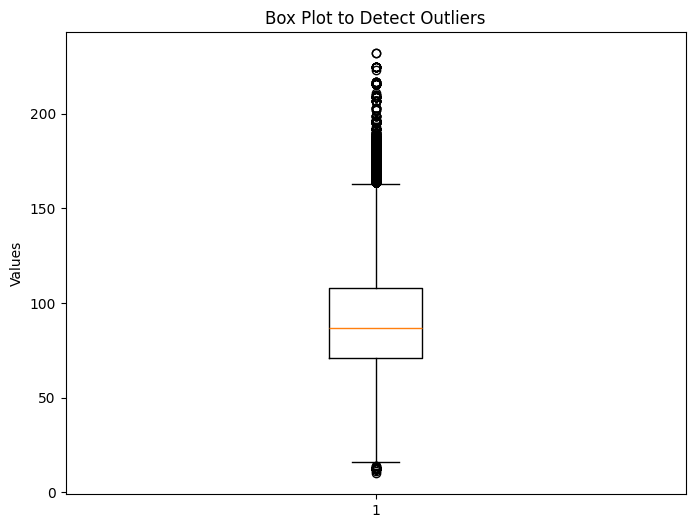

In [37]:
plt.figure(figsize=(8, 6))
plt.boxplot(heart_rate["heart_rate"])
plt.title("Box Plot to Detect Outliers")
plt.ylabel("Values")
plt.show()

In this dataset, Winsorization will be used to handle the outliers in the heart rate data. Specifically, we will set a lower bound of 40 and an upper bound of 180 for the heart rate values. Lower Bound (40): Heart rates below 40 bpm are considered abnormally low. Upper Bound (180): Heart rates above 180 bpm are considered abnormally high. 

In [38]:
heart_rate['heart_rate'] = heart_rate['heart_rate'].clip(lower=40, upper=180)

plot the boxplot of the heart rate data to show the outliers again.

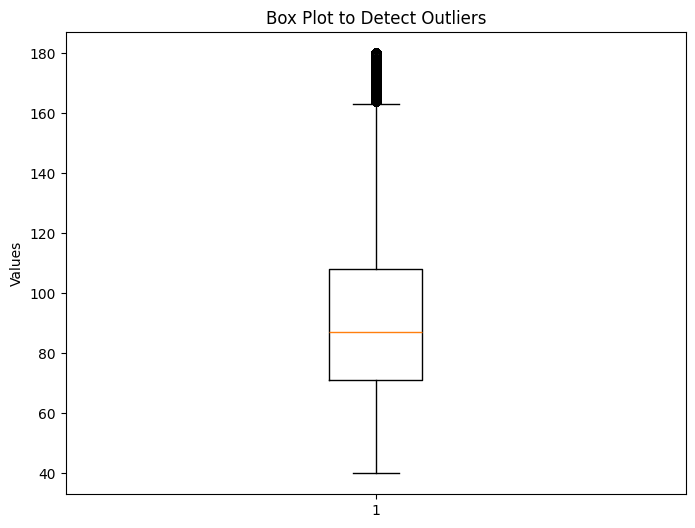

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(heart_rate["heart_rate"])
plt.title("Box Plot to Detect Outliers")
plt.ylabel("Values")
plt.show()

Now, it is way better than before.

## data transformation

for date related columns, we will convert the data type to datetime. so we can use the data more easily. For example, in the `sleep` dataset, the `day`, `sleep_begin`, `sleep_end` column is in string format. We will convert it to datetime format. 

Before transformation:

In [40]:
sleep.head()

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5


In [41]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  9 non-null      float64
 6   sleep_rem_duration    7 non-null      float64
 7   sleep_light_duration  27 non-null     float64
 8   sleep_deep_duration   14 non-null     float64
 9   pulse_min             15 non-null     float64
 10  pulse_max             15 non-null     float64
 11  pulse_average         15 non-null     float64
dtypes: float64(8), object(4)
memory usage: 40.0+ KB


convert the columns to datetime format:

In [42]:
for column in ['day', 'sleep_begin', 'sleep_end']:
    sleep[column] = pd.to_datetime(sleep[column])

In [43]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_code             425 non-null    object        
 1   day                   425 non-null    datetime64[ns]
 2   sleep_begin           425 non-null    datetime64[ns]
 3   sleep_end             425 non-null    datetime64[ns]
 4   sleep_duration        425 non-null    float64       
 5   sleep_awake_duration  9 non-null      float64       
 6   sleep_rem_duration    7 non-null      float64       
 7   sleep_light_duration  27 non-null     float64       
 8   sleep_deep_duration   14 non-null     float64       
 9   pulse_min             15 non-null     float64       
 10  pulse_max             15 non-null     float64       
 11  pulse_average         15 non-null     float64       
dtypes: datetime64[ns](3), float64(8), object(1)
memory usage: 40.0+ KB


In [44]:
sleep.head()

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5


## Create a new feature

We will create a new feature called BMI (Body Mass Index) based on the `participants` dataset. The formula for BMI is: 

$$ \frac{BodyMass}{BodyHeight^2} $$

where `BodyMass` is in kilograms and `BodyHeight` is in meters.



In [45]:
participants["BMI"] = participants["weight"] / (participants["height"] / 100) ** 2
participants.head()

,user_code,gender,age_range,city,country,height,weight,symptoms_onset,BMI
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN,33.203698
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020,25.531774
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020,29.036738
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020,21.007668
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020,27.439513


## Colinear analysis

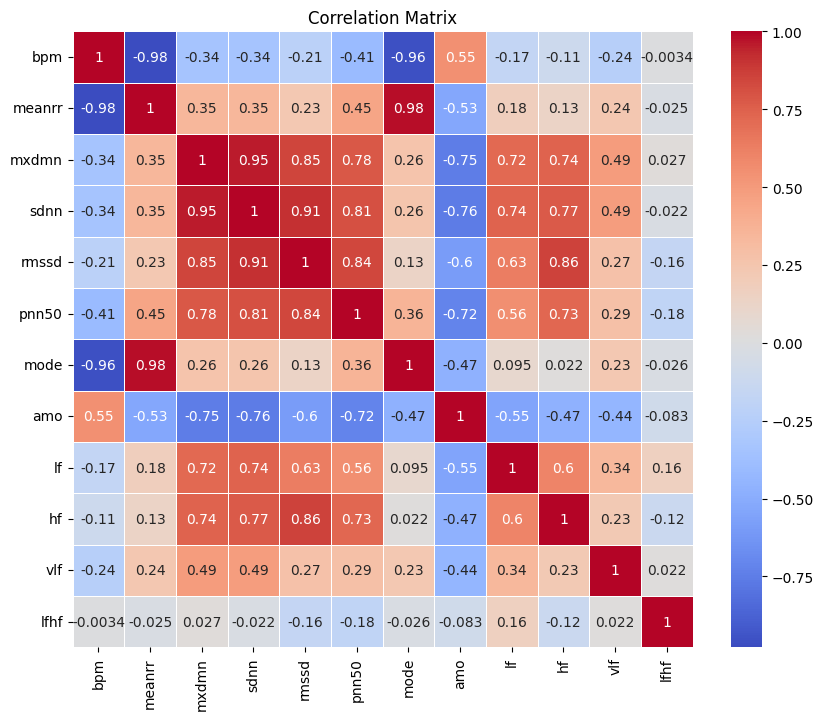

In [46]:
import seaborn as sns

correlation_matrix = hrv_measurements[
    [
        "bpm",
        "meanrr",
        "mxdmn",
        "sdnn",
        "rmssd",
        "pnn50",
        "mode",
        "amo",
        "lf",
        "hf",
        "vlf",
        "lfhf",
    ]
].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

As you can see from the correlation matrix, some columns such like `bpm` and `meanrr`, `meanrr` and `mode` are highly correlated. We can drop one of them to avoid multicollinearity.

## data visualization

We will visualize the data to get a better understanding of the data. Let's start with the `participants` dataset. We want to know the distribution of the `age_range` and `gender` columns.

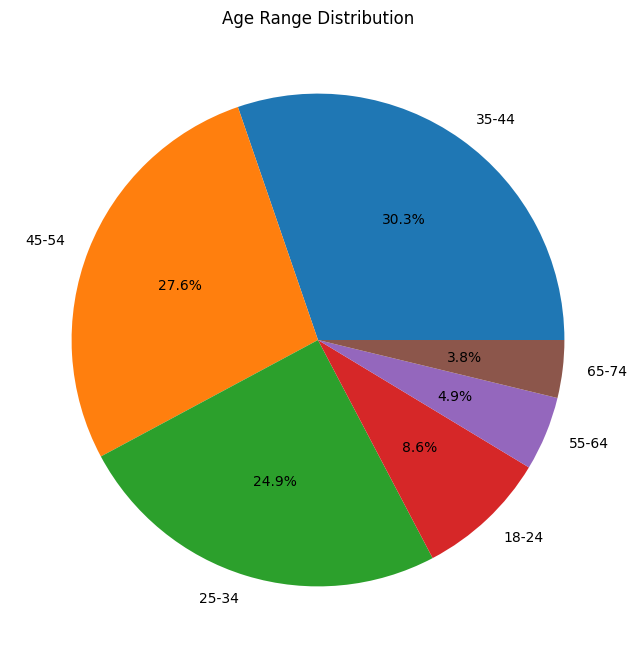

In [47]:
# pie chart of age_range of participants

age_range_counts = participants["age_range"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_range_counts, labels=age_range_counts.index, autopct="%1.1f%%")
plt.title("Age Range Distribution")
plt.show()

From the pie plot of the `age_range` column, we can see that most of the users are in the age range of 25-54.

Now let's visualize the `gender` column. 

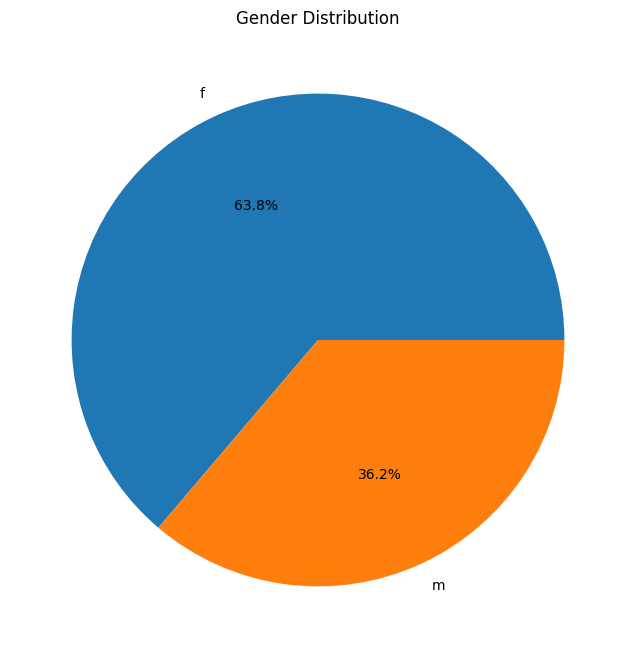

In [48]:
# pie chart of gender of participants

gender_counts = participants["gender"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

As we can see, the majority of user is female.

## Dimensionality reduction

We will use PCA to reduce the dimensionality of the dataset. We will use the `hrv_measurements` dataset to perform PCA.

In [49]:
hrv_measurements.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,...,409.0,310.0,176.0,1.319,895.0,0,0,0.0,NaN,"888,775,811,883,890,894,894,899,893,889,890,83..."
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,...,432.0,881.0,194.0,0.490,1507.0,-1,-2,NaN,COVID-19; Fast/Diet; Hungry; Tired; Fever; I c...,"694,832,642,801,751,716,737,742,773,760,701,73..."
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,...,814.0,1487.0,1719.0,0.547,4020.0,0,0,NaN,NaN,"821,817,771,805,833,788,747,724,792,825,775,75..."
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,...,489.0,128.0,96.0,3.820,713.0,0,0,0.0,NaN,"741,740,734,737,740,731,751,747,745,728,747,76..."


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaler the data, for better PCA results
scaler = StandardScaler()
df_scaled = scaler.fit_transform(
    hrv_measurements[
        [
            "bpm",
            "meanrr",
            "mxdmn",
            "sdnn",
            "rmssd",
            "pnn50",
            "mode",
            "amo",
            "lf",
            "hf",
            "vlf",
            "lfhf",
        ]
    ]
)

pca = PCA(n_components=2)  # Only keep the first 2 principal components
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

explained_variance = pca.explained_variance_ratio_
print("PCA explained:", explained_variance)

PCA explained: [0.51686808 0.2143145 ]


This means PC1 can explain 52% of the variance in the dataset. PC2 can explain 21% of the variance in the dataset. Those two components can explain 73% of the variance in the dataset.

Let's plot the PCA results.

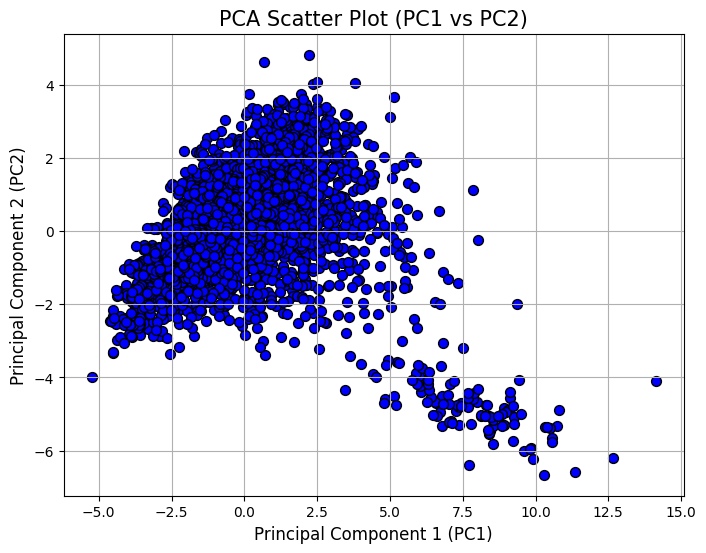

In [51]:
plt.figure(figsize=(8, 6))

plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)

plt.title('PCA Scatter Plot (PC1 vs PC2)', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.grid(True)
plt.show()

## data quality assessment

### data profiling

Data profiling involves examining the data to understand its basic characteristics, structure, and quality. What we can checkout:

**Data type**：Check the data types of each column (numeric, categorical, datetime, etc.). In the datasets, we have correct data type for each column.

**Descriptive statistics**： Calculate basic statistics for numeric columns (mean, median, standard deviation, min, max). Analyze the distribution of values (e.g., using histograms or box plots). In the datasets, we have some potential outliers.

**Missing data**: Calculate the percentage of missing values for each column. In the datasets, we have lots of missing values.


### data completeness

Data completeness requires all required data is present in the dataset. In our case, we have observed significant missing values across various columns, so the datasets are not complete.

### data accuracy

In the datasets, it is very hard to determine the accuracy of the data. because we don't have the true value. The only way we can do is try to find the outlier.


### data consistency

In the datsets, we need to check if there are any inconsistencies in how data is recorded or represented across different users or time. As far as we can see, there are no inconsistencies in the datasets.


### data integrity

Based on our observation so far, there don't appear to be major data integrity issues, but a more work is needed to confirm this.

### data lineage and provenance

The source of the data is Welltory app. The data is collected from the users who use the Welltory app to track their health. The history of the data can be found in the github repository.



## References

The dataset used in this assignment is from the "COVID-19 and Wearables Open Data Research" project by Welltory. This dataset is available in the following GitHub repository:

[Welltory/hrv-covid19](https://github.com/Welltory/hrv-covid19)
